## 2.2 웹크롤링 맛보기

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import selenium
help(selenium)

Help on package selenium:

NAME
    selenium

DESCRIPTION
    # Licensed to the Software Freedom Conservancy (SFC) under one
    # or more contributor license agreements.  See the NOTICE file
    # distributed with this work for additional information
    # regarding copyright ownership.  The SFC licenses this file
    # to you under the Apache License, Version 2.0 (the
    # "License"); you may not use this file except in compliance
    # with the License.  You may obtain a copy of the License at
    #
    #   http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing,
    # software distributed under the License is distributed on an
    # "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
    # KIND, either express or implied.  See the License for the
    # specific language governing permissions and limitations
    # under the License.

PACKAGE CONTENTS
    common (package)
    types
    webdriver (package)

VERSION
    4.0.0

In [15]:
ser = Service('./chromedriver.exe')
driver = webdriver.Chrome(service = ser)

<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url"
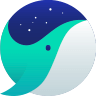
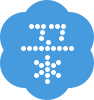

In [16]:
url = 'https://www.naver.com/'
driver.get(url)
html = driver.page_source
print(html)

In [5]:
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''

In [6]:
html

"\n<html>\n    <head>\n    </head>\n    <body>\n        <h1> 우리동네시장</h1>\n            <div class = 'sale'>\n                <p id='fruits1' class='fruits'>\n                    <span class = 'name'> 바나나 </span>\n                    <span class = 'price'> 3000원 </span>\n                    <span class = 'inventory'> 500개 </span>\n                    <span class = 'store'> 가나다상회 </span>\n                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n                </p>\n            </div>\n            <div class = 'prepare'>\n                <p id='fruits2' class='fruits'>\n                    <span class ='name'> 파인애플 </span>\n                </p>\n            </div>\n    </body>\n</html>\n"

In [7]:
! pip install bs4

## 태그 속성 활용

In [7]:
from bs4 import BeautifulSoup

In [8]:
# html 파서를 해서 주는 것
soup = BeautifulSoup(html, 'html.parser')
print(soup)


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>



In [29]:
tags_span = soup.select('span') # 변수 재사용을 위한 할당
print(tags_span)
len(tags_span)
type(tags_span)

[<span class="name"> 바나나 </span>, <span class="price"> 3000원 </span>, <span class="inventory"> 500개 </span>, <span class="store"> 가나다상회 </span>, <span class="name"> 파인애플 </span>]


bs4.element.ResultSet

In [25]:
tags_p = soup.select('p')
print(tags_p)
len(tags_p)
tags_p

[<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>, <p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>]


[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

In [31]:
# id에 접근하려면 #을 사용한다.
soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [34]:
# class는 .을 통해서 접근할 수 있다.
soup.select('.name')
soup.select('.price')
soup.select('.inventory')

[<span class="inventory"> 500개 </span>]

In [36]:
# 태그와 class를 같이 특정하는 방법도 있다.
soup.select('span.name')

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [47]:
# 상위 구조 활용하기
print(soup)
print(soup.select('#fruits1 > span.name'))
print(soup.select('div.sale > #fruits1 >  span.name')) # 계단 처럼 하나씩 모든 태그를 지나 갈때는 > 를 사용한다.
print(soup.select('div.sale > p.fruits >  span.name'))
soup.select('div.sale span.name') # 중간에 태그를 무시할 경우 즉 하위 전체 태그내에서 찾아서 고를 경우에 > 대신 빈칸을 사용한다.


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


[<span class="name"> 바나나 </span>]

- 실제 contents 뽑아내기

In [67]:
name = soup.select('span.name')
print(name)

name_0 = name[0]
name_1 = name[1]
print(name_0)
print(name_1)

print(name_0.text)
print(name_1.text)

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]
<span class="name"> 바나나 </span>
<span class="name"> 파인애플 </span>
 바나나 
 파인애플 


In [74]:
tags = soup.select('a')
print(tags, '\n')
print(type(tags),'\n')

tag = tags[0]
print(tag, '\n')
print(tag.text, '\n')
print(type(tag), '\n')
print(tag['href'])

[<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>] 

<class 'bs4.element.ResultSet'> 

<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a> 

 홈페이지  

<class 'bs4.element.Tag'> 

http://bit.ly/forPlaywithData


## melon chart 예제

In [80]:
# 웹브라우저 동작을 위핸 selenium과 html 파싱을 위한 BeatifulSoup를 import
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

In [81]:
ser = Service('./chromedriver.exe')
driver = webdriver.Chrome(service = ser)
url = 'https://www.melon.com/chart/index.htm'
driver.get(url)

In [83]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="국내 최다 4,000만곡 보유, No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="e2b43191afa0f1d2deb8e2cda8f45ee1408c44a1" name="naver-site-verification"/>
<meta content="5IbZkQIBKFswwVZeAGJ2Fx3kg6aF8RTAGEU6wlsOWLk" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<me

In [148]:
# 나의 풀이
song_titles = soup.select('tbody > tr  div.ellipsis.rank01 a')
singers = soup.select('tbody > tr  div.ellipsis.rank02 > a')

chart_100_titles = []
chart_100_singers = []

for title in song_titles :
    chart_100_titles.append(title.text)
    
for singer in singers :
    chart_100_singers.append(singer.text)
    
for i in range(len(chart_100_titles)) :
    print("{}위 노래 제목은 {}, 가수는 {}입니다.".format(i+1, chart_100_titles[i], chart_100_singers[i]))

1위 노래 제목은 사랑은 늘 도망가, 가수는 임영웅입니다.
2위 노래 제목은 취중고백, 가수는 김민석 (멜로망스)입니다.
3위 노래 제목은 회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom), 가수는 sokodomo입니다.
4위 노래 제목은 Counting Stars (Feat. Beenzino), 가수는 BE'O (비오)입니다.
5위 노래 제목은 ELEVEN, 가수는 IVE (아이브)입니다.
6위 노래 제목은 리무진 (Feat. MINO) (Prod. GRAY), 가수는 BE'O (비오)입니다.
7위 노래 제목은 겨울잠, 가수는 아이유입니다.
8위 노래 제목은 Dreams Come True, 가수는 aespa입니다.
9위 노래 제목은 눈이 오잖아(Feat.헤이즈), 가수는 이무진입니다.
10위 노래 제목은 만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL), 가수는 베이식 (Basick)입니다.
11위 노래 제목은 다정히 내 이름을 부르면, 가수는 경서예지입니다.
12위 노래 제목은 strawberry moon, 가수는 전건호입니다.
13위 노래 제목은 Step Back, 가수는 아이유입니다.
14위 노래 제목은 신호등, 가수는 GOT the beat입니다.
15위 노래 제목은 Savage, 가수는 이무진입니다.
16위 노래 제목은 드라마, 가수는 aespa입니다.
17위 노래 제목은 STAY, 가수는 아이유입니다.
18위 노래 제목은 이제 나만 믿어요, 가수는 The Kid LAROI입니다.
19위 노래 제목은 Next Level, 가수는 Justin Bieber입니다.
20위 노래 제목은 불협화음 (Feat. AKMU) (Prod. GRAY), 가수는 임영웅입니다.
21위 노래 제목은 Christmas Tree, 가수는 aespa입니다.
22위 노래 제목은 흰눈, 가수는 Mudd the student입니다.
23위 노래 제목은 우리가 헤어져야 했던 이유, 가수는 V입니다.
24위 노래 제목은 그대라는 사치